ACT 5 

In [ ]:
#librerias 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import re

In [169]:
#cargar archivo xlsx sin indice
df = pd.read_csv('NEWYORK_Sin_Atipicos_Desv_limpio.csv')

In [170]:
#verificamos información del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36322 entries, 0 to 36321
Data columns (total 55 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0.1                  36322 non-null  int64  
 1   id                            36322 non-null  float64
 2   last_scraped                  36322 non-null  object 
 3   source                        36322 non-null  object 
 4   host_since                    36322 non-null  object 
 5   host_location                 36322 non-null  object 
 6   host_about                    36322 non-null  object 
 7   host_response_time            36322 non-null  object 
 8   host_acceptance_rate          36322 non-null  float64
 9   host_is_superhost             36322 non-null  object 
 10  host_picture_url              36322 non-null  object 
 11  host_neighbourhood            36322 non-null  object 
 12  host_verifications            36322 non-null  object 
 13  h

In [171]:
#checar los nulos
valores_nulos=df.isnull().sum() 
valores_nulos

Unnamed: 0.1                    0
id                              0
last_scraped                    0
source                          0
host_since                      0
host_location                   0
host_about                      0
host_response_time              0
host_acceptance_rate            0
host_is_superhost               0
host_picture_url                0
host_neighbourhood              0
host_verifications              0
host_has_profile_pic            0
host_identity_verified          0
neighbourhood                   0
neighbourhood_cleansed          0
neighbourhood_group_cleansed    0
latitude                        0
longitude                       0
property_type                   0
room_type                       0
bathrooms_text                  0
bedrooms                        0
beds                            0
price                           0
has_availability                0
calendar_last_scraped           0
estimated_revenue_l365d         0
first_review  

In [172]:
#imprimemos las primeras filas del dataframe
df.head()

,Unnamed: 0.1,id,last_scraped,source,host_since,host_location,host_about,host_response_time,host_acceptance_rate,host_is_superhost,...,minimum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,estimated_occupancy_l365d
0,0,2539.0,2025-06-17,city scrape,2008-09-07,"New York, NY",Educated professional living in Brooklyn. I l...,within a few hours,80.0,f,...,30.0,12,42,72,347,9.0,0.0,0.0,180,0
1,1,2595.0,2025-06-17,city scrape,2008-09-09,"Woodstock, NY",A New Yorker since 2000! My passion is creatin...,within a few hours,24.0,f,...,30.0,0,7,37,312,49.0,0.0,0.0,145,0
2,2,5136.0,2025-06-17,city scrape,2009-02-03,"New York, NY","Rebecca is an artist/designer, and Henoch is i...",unknown,100.0,f,...,30.0,0,29,37,80,4.0,0.0,0.0,80,0
3,3,6848.0,2025-06-17,city scrape,2009-05-06,"New York, NY",We love to travel. When we travel we like to s...,within an hour,100.0,t,...,30.0,0,0,6,219,196.0,4.0,1.0,52,240
4,4,6872.0,2025-06-17,previous scrape,2009-05-07,"New York, NY",A former life in fashion and wellness has left...,within a day,33.0,f,...,30.0,1,1,1,2,1.0,0.0,0.0,2,0


In [173]:
#obtengo un analisis univariado de las variables catégoricas
Tabla_freq=df['last_scraped'].value_counts().reset_index()
Tabla_freq

,last_scraped,count
0,2025-06-17,33318
1,2025-06-18,3004


In [174]:
#obtengo filtro de los valores mas relevantes de la variable catégorica seleccionada
filtro=Tabla_freq[Tabla_freq['count']>1]
filtro

,last_scraped,count
0,2025-06-17,33318
1,2025-06-18,3004


In [175]:
#ajusto el indice de mi dataframe
filtro_index=filtro.set_index('last_scraped')
filtro_index

,count
last_scraped,
2025-06-17,33318
2025-06-18,3004


Text(0, 0.5, 'Frecuencia')

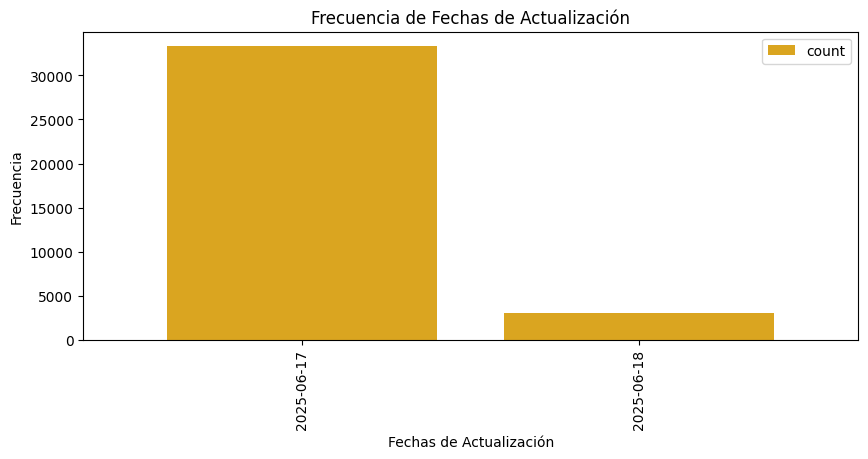

In [176]:
#realizamos un grafico de barras del dataframe filtrado
filtro_index.plot(kind='bar', width=0.8, figsize= (10,4),color = 'goldenrod')
plt.title('Frecuencia de Fechas de Actualización')
plt.xlabel('Fechas de Actualización')
plt.ylabel('Frecuencia')

In [177]:
#obtengo un analisis univariado de las variables catégoricas
Tabla_freq2=df['host_location'].value_counts().reset_index()
Tabla_freq2

,host_location,count
0,"New York, NY",21784
1,unknown,7409
2,"New York, United States",3003
3,United States,340
4,"Dubai, United Arab Emirates",336
...,...,...
981,"Texas City, TX",1
982,"State of Bahia, Brazil",1
983,"Calgary, Canada",1
984,"Centennial, CO",1


In [178]:
#obtengo filtro de los valores mas relevantes de la variable catégorica seleccionada
filtro2=Tabla_freq2[Tabla_freq2['count']>200]
filtro2

,host_location,count
0,"New York, NY",21784
1,unknown,7409
2,"New York, United States",3003
3,United States,340
4,"Dubai, United Arab Emirates",336
5,"Los Angeles, CA",277


In [179]:
#ajusto el indice de mi dataframe
filtro_index=filtro2.set_index('host_location')
filtro_index

,count
host_location,
"New York, NY",21784
unknown,7409
"New York, United States",3003
United States,340
"Dubai, United Arab Emirates",336
"Los Angeles, CA",277


Text(0, 0.5, 'Frecuencia')

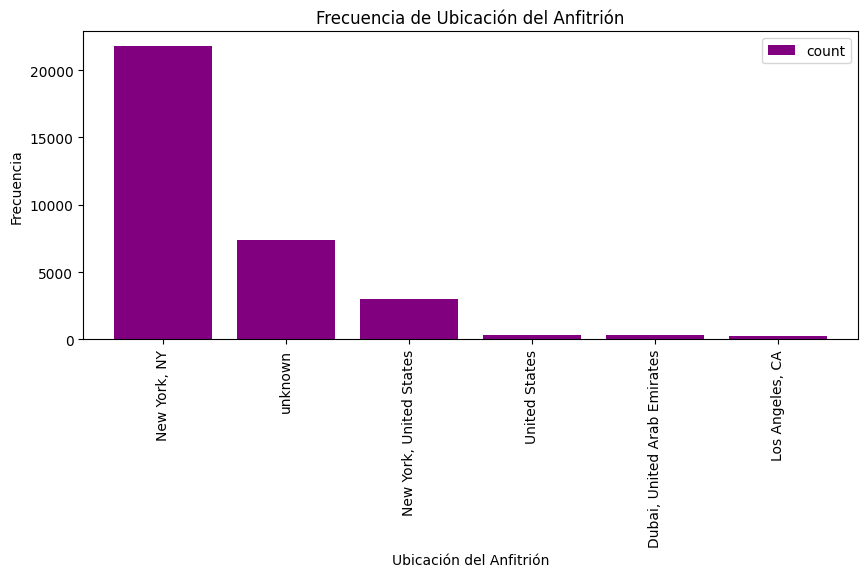

In [180]:
#realizamos un grafico de barras del dataframe filtrado
filtro_index.plot(kind='bar', width=0.8, figsize= (10,4),color = 'purple')
plt.title('Frecuencia de Ubicación del Anfitrión')
plt.xlabel('Ubicación del Anfitrión')   
plt.ylabel('Frecuencia')

In [181]:
##analisis univariado de las variables catégoricas
Tabla_freq3=df['source'].value_counts().reset_index()
Tabla_freq3

,source,count
0,city scrape,21690
1,previous scrape,14632


In [182]:
#filtro de los valores mas relevantes de la variable catégorica seleccionada
filtro3=Tabla_freq3[Tabla_freq3['count']>250]
filtro3

,source,count
0,city scrape,21690
1,previous scrape,14632


In [183]:
#ajusto el indice de mi dataframe
filtro_index=filtro3.set_index('source')
filtro_index

,count
source,
city scrape,21690
previous scrape,14632


Text(0.5, 1.0, 'city')

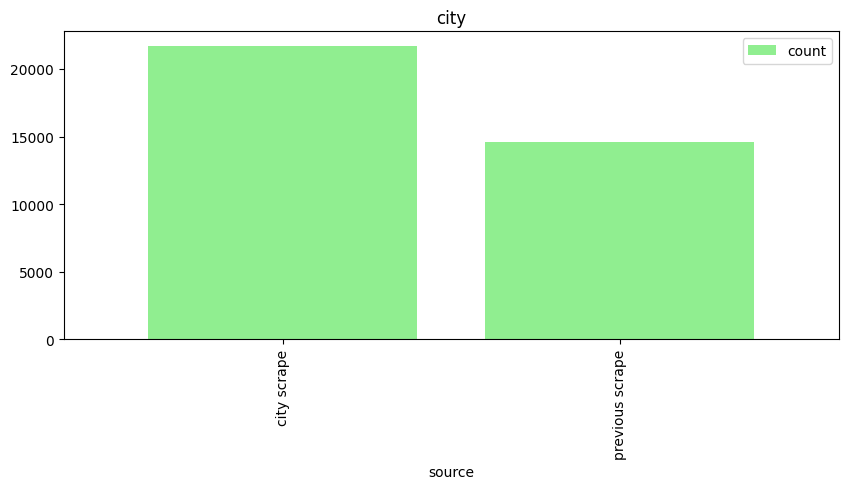

In [184]:
#realizamos un grafico de barras del dataframe filtrado
filtro_index.plot(kind='bar', width=0.8, figsize= (10,4),color = 'lightgreen')
plt.title('city')

In [185]:
##analisis univariado de las variables catégoricas
Tabla_freq4=df['host_neighbourhood'].value_counts().reset_index()
Tabla_freq4


,host_neighbourhood,count
0,unknown,7288
1,Bedford-Stuyvesant,1900
2,Williamsburg,1751
3,Bushwick,1191
4,Jamaica,1076
...,...,...
531,Noe Valley,1
532,Roma Norte,1
533,Mount Pleasant/Lower Broadway,1
534,Las Lomas I,1


In [186]:
#obtengo filtro de los valores mas relevantes de la variable catégorica seleccionada
filtro4=Tabla_freq4[Tabla_freq4['count']>650]
filtro4

,host_neighbourhood,count
0,unknown,7288
1,Bedford-Stuyvesant,1900
2,Williamsburg,1751
3,Bushwick,1191
4,Jamaica,1076
5,Cambridge,1059
6,Flatbush,990
7,Flushing,950
8,Crown Heights,940
9,Harlem,686


In [187]:
#ajusto el indice de mi dataframe
filtro_index4=filtro4.set_index('host_neighbourhood')
filtro_index4

,count
host_neighbourhood,
unknown,7288
Bedford-Stuyvesant,1900
Williamsburg,1751
Bushwick,1191
Jamaica,1076
Cambridge,1059
Flatbush,990
Flushing,950
Crown Heights,940


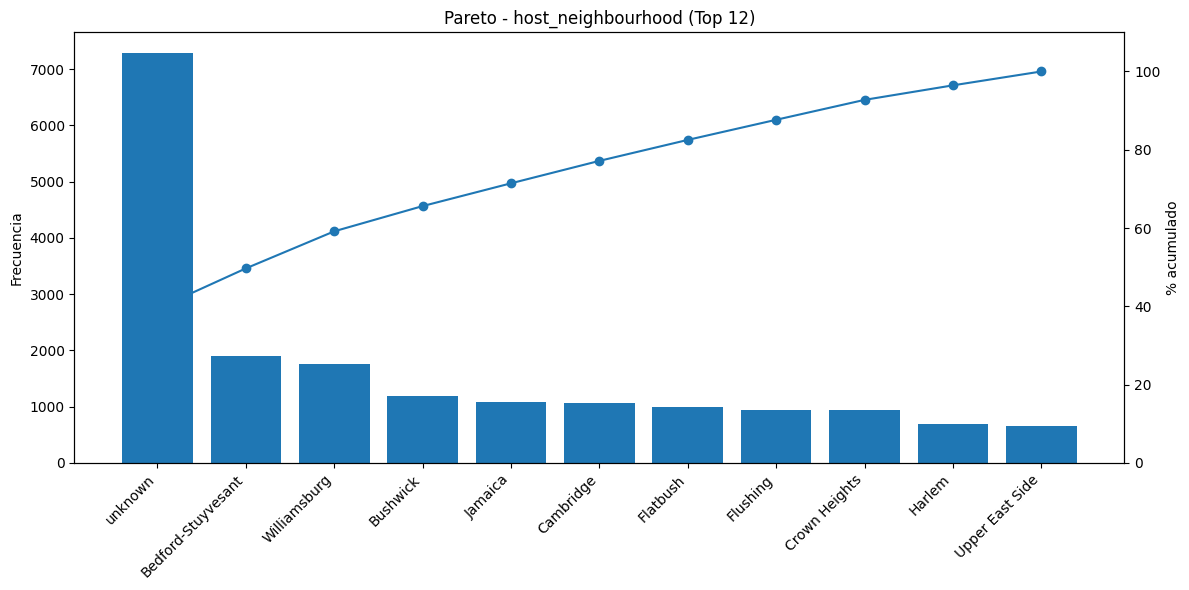

In [188]:
#realizamos un grafico de barras del dataframe filtrado
top_n = 12  
vc = filtro_index4['count'].sort_values(ascending=False).head(top_n)
cum = (vc.cumsum() / vc.sum()) * 100

x = range(len(vc))
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.bar(x, vc.values)
ax1.set_xticks(x)
ax1.set_xticklabels(vc.index, rotation=45, ha='right')
ax1.set_ylabel("Frecuencia")

ax2 = ax1.twinx()
ax2.plot(x, cum.values, marker="o")
ax2.set_ylabel("% acumulado")
ax2.set_ylim(0, 110)

plt.title(f"Pareto - host_neighbourhood (Top {top_n})")
plt.tight_layout()
plt.show()

Sirve para priorizar y tomar decisiones rápidas con una variable categórica (aquí, host_neighbourhood):

Identificar los “pocos vitales” (80/20): las barras muestran los barrios con más hosts y la línea el % acumulado. Donde la línea cruza ~80% tienes los barrios que concentran la mayor parte de los registros → enfoca esfuerzos allí (análisis, campañas, cobertura, auditorías).

Asignar recursos / segmentar: si vas a hacer marketing, soporte o control de calidad, el Pareto te dice en qué barrios impactas más con menos esfuerzo.

Calidad de datos: categorías como unknown altas (en tu tabla es la mayor) señalan datos faltantes o mal capturados. Úsalo para:

priorizar limpieza (imputar/estandarizar vecindarios),

revisar el pipeline que genera ese “unknown”.

Definir cortes y reportes: el punto donde la línea acumula 80–90% te da un top N defendible para dashboards o SLAs (p. ej., “cubrir el 85% de los listings en X barrios”).

Comparar en el tiempo: rehacer el Pareto por mes/temporada para ver cambios en concentración (¿surgen nuevos barrios clave?).

Cómo leerlo en 10s

Ordena descendentemente (ya lo hicimos).

Mira dónde la línea acumulada llega a 80%.

Toma esas categorías como prioridad; todo lo demás es “cola larga”.

In [189]:
##analisis univariado de las variables catégoricas
Tabla_freq5=df['host_response_time'].value_counts().reset_index()
Tabla_freq5


,host_response_time,count
0,unknown,14772
1,within an hour,13307
2,within a few hours,4710
3,within a day,2126
4,a few days or more,1407


In [192]:
#obtengo filtro de los valores mas relevantes de la variable catégorica seleccionada
filtro5=Tabla_freq5[Tabla_freq5['count']>1100]
filtro5

,host_response_time,count
0,unknown,14772
1,within an hour,13307
2,within a few hours,4710
3,within a day,2126
4,a few days or more,1407


In [193]:
#ajusto el indice de mi dataframe
filtro_index5=filtro5.set_index('host_response_time')   
filtro_index5


,count
host_response_time,
unknown,14772
within an hour,13307
within a few hours,4710
within a day,2126
a few days or more,1407


<Axes: xlabel='host_response_time'>

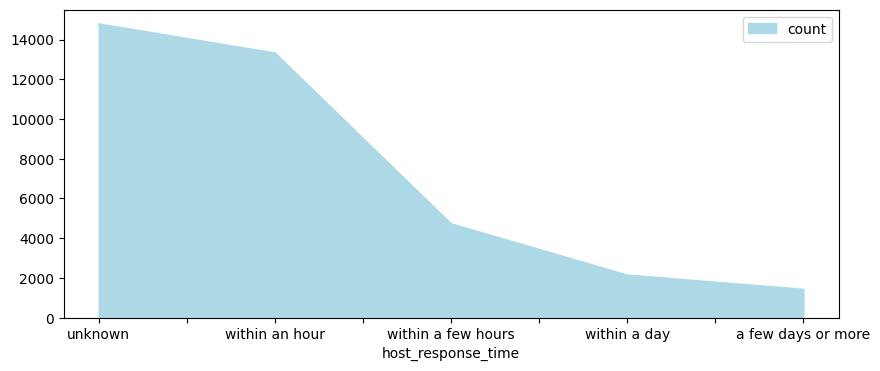

In [194]:
#realizamos grafico de area del dataframe filtrado
filtro_index5.plot(kind='area', figsize=(10,4),alpha = 1, color = 'lightblue')

In [196]:
##analisis univariado de las variables catégoricas
Tabla_freq6=df['host_is_superhost'].value_counts().reset_index()
Tabla_freq6

,host_is_superhost,count
0,f,29254
1,t,6576
2,false,492


In [197]:
#obtengo filtro de los valores mas relevantes de la variable catégorica seleccionada
filtro6=Tabla_freq6[Tabla_freq6['count']>5000]
filtro6

,host_is_superhost,count
0,f,29254
1,t,6576


In [199]:
#ajusto el indice de mi dataframe
filtro_index6=filtro6.set_index('host_is_superhost')   
filtro_index6

,count
host_is_superhost,
f,29254
t,6576


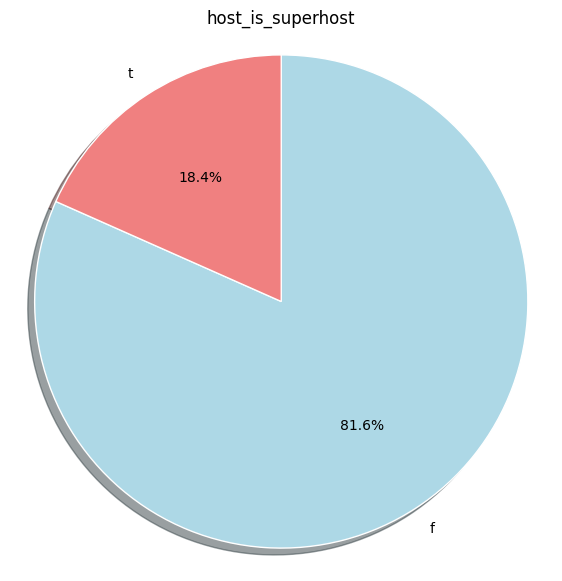

In [ ]:
#realizamos grafico de pastel del dataframe filtrado
# Pie de 'host_is_superhost' usando tu tabla filtro_index6 (index=f/t, col=count)
ax = filtro_index6["count"].plot(
    kind="pie",
    figsize=(7, 7),
     colors=["lightblue", "lightcoral"],
    autopct="%.1f%%",     
    startangle=90,
    counterclock=False,
    shadow=True,
    wedgeprops={"linewidth": 1, "edgecolor": "white"},
)
plt.title("host_is_superhost")
plt.ylabel("")            
plt.axis("equal")       
plt.show()

In [206]:
##analisis univariado de las variables catégoricas
Tabla_freq7=df['property_type'].value_counts().reset_index()
Tabla_freq7

,property_type,count
0,Entire rental unit,15335
1,Private room in rental unit,9948
2,Private room in home,2613
3,Room in hotel,1367
4,Entire home,1304
...,...,...
69,Private room in castle,1
70,Private room in tower,1
71,Shared room in bed and breakfast,1
72,Private room in dome,1


In [207]:
#obtengo filtro de los valores mas relevantes de la variable catégorica seleccionada
filtro7=Tabla_freq7[Tabla_freq7['count']>1000]
filtro7

,property_type,count
0,Entire rental unit,15335
1,Private room in rental unit,9948
2,Private room in home,2613
3,Room in hotel,1367
4,Entire home,1304
5,Private room in townhouse,1095
6,Entire condo,1085


In [208]:
#ajusto el indice de mi dataframe
filtro_inditex7=filtro7.set_index('property_type')   
filtro_inditex7

,count
property_type,
Entire rental unit,15335
Private room in rental unit,9948
Private room in home,2613
Room in hotel,1367
Entire home,1304
Private room in townhouse,1095
Entire condo,1085


Text(0.5, 0, 'property_type')

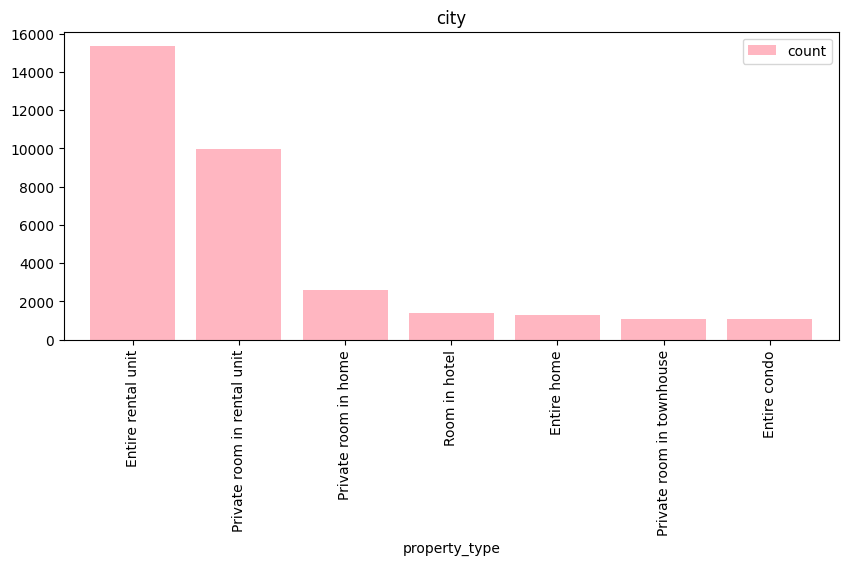

In [210]:
#realizamos un grafico de barras del dataframe filtrado
filtro_inditex7.plot(kind='bar', width=0.8, figsize= (10,4),color = 'lightpink')
plt.title('city')
plt.xlabel('property_type')

In [211]:
#analisis bivariado de las variables catégoricas
Tabla_freq8=df['has_availability'].value_counts().reset_index()
Tabla_freq8

,has_availability,count
0,t,30705
1,F,5617


In [212]:
#filtro de los valores mas relevantes de la variable catégorica seleccionada
filtro8=Tabla_freq8[Tabla_freq8['count']>2000]
filtro8

,has_availability,count
0,t,30705
1,F,5617


In [213]:
#ajusto el indice de mi dataframe
filtro_inditex8=filtro8.set_index('has_availability')
filtro_inditex8

,count
has_availability,
t,30705
F,5617


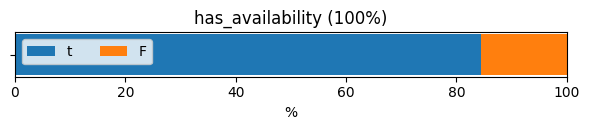

In [214]:
#realizamos un grafico de barras del dataframe filtrado
# Barras horizontales apiladas de 'has_availability' usando tu tabla filtro_ind
data = filtro_inditex8["count"]
pct = (data / data.sum() * 100)

plt.figure(figsize=(6,1.4))
left = 0
for lab, val in pct.items():
    plt.barh([""], [val], left=left, label=str(lab))
    left += val

plt.xlim(0,100); plt.xlabel("%")
plt.title("has_availability (100%)"); plt.legend(ncol=len(pct))
plt.tight_layout(); plt.show()

In [215]:
##analisis univariado de las variables catégoricas
Tabla_freq8=df['availability_365'].value_counts().reset_index()
Tabla_freq8

,availability_365,count
0,0,12381
1,365,2501
2,364,841
3,363,642
4,269,454
...,...,...
361,161,15
362,11,15
363,116,14
364,117,12


In [216]:
#obtengo filtro de los valores mas relevantes de la variable catégorica seleccionada
filtro8=Tabla_freq8[Tabla_freq8['count']>400]
filtro8

,availability_365,count
0,0,12381
1,365,2501
2,364,841
3,363,642
4,269,454
5,270,413


In [218]:
#ajusto el indice de mi dataframe
filtro_index8=filtro8.set_index('availability_365')
filtro_index8

,count
availability_365,
0,12381
365,2501
364,841
363,642
269,454
270,413


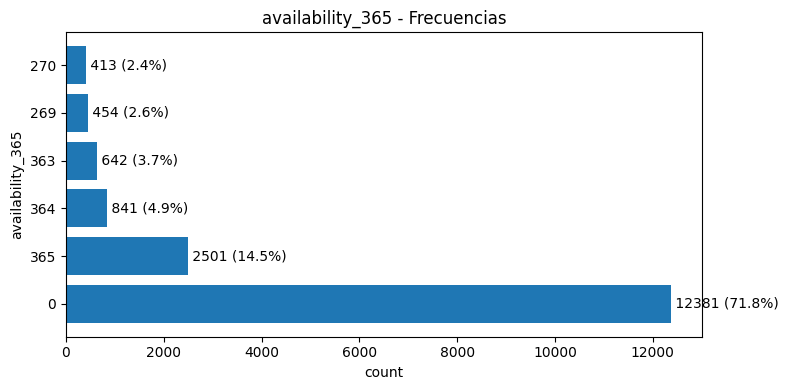

In [ ]:
#realizamos un grafico de barras del dataframe filtrado
s = filtro_index8["count"].sort_values(ascending=False)
pct = (s / s.sum() * 100).round(1)

plt.figure(figsize=(8, 4))
plt.barh(s.index.astype(str), s.values)
for y, v, p in zip(range(len(s)), s.values, pct.values):
    plt.text(v, y, f" {v} ({p}%)", va="center")  

plt.title("availability_365 - Frecuencias")
plt.xlabel("count")
plt.ylabel("availability_365")
plt.tight_layout()
plt.show()

In [222]:
#analisis bivariado de las variables catégoricas
Tabla_freq9=df['review_scores_value'].value_counts().reset_index()
Tabla_freq9



,review_scores_value,count
0,0.00,11171
1,5.00,5959
2,4.00,1188
3,4.50,1069
4,4.67,870
...,...,...
166,4.03,1
167,3.99,1
168,3.11,1
169,3.77,1


In [224]:
#obtengo filtro de los valores mas relevantes de la variable catégorica seleccionada
filtro9=Tabla_freq9[Tabla_freq8['count']>500]
filtro9

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12980\2117073854.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtro9=Tabla_freq9[Tabla_freq8['count']>500]


,review_scores_value,count
0,0.0,11171
1,5.0,5959
2,4.0,1188
3,4.5,1069


In [225]:
#ajusto el indice de mi dataframe
filtro_index9=filtro9.set_index('review_scores_value')
filtro_index9

,count
review_scores_value,
0.0,11171
5.0,5959
4.0,1188
4.5,1069


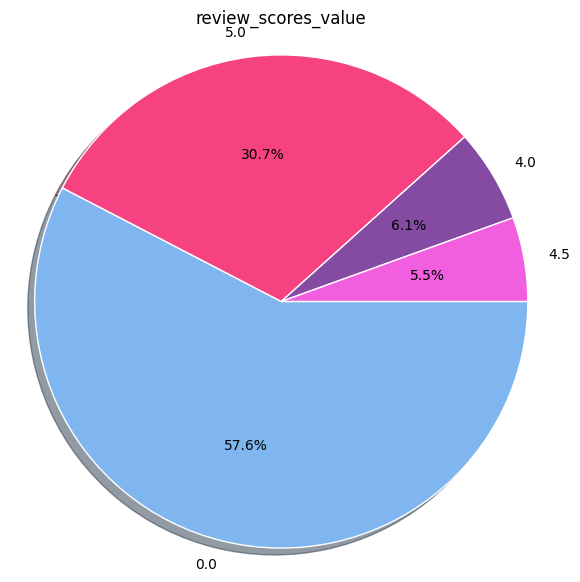

In [229]:
#realizamos grafico de pastel del dataframe filtrado
s = filtro_index9["count"]
s.index = s.index.astype(str) 

ax = s.plot(
    kind="pie",
    figsize=(7,7),
    autopct="%.1f%%",     
    counterclock=False,
    shadow=True,
    colors=["#80B6F0","#F64281","#854BA2","#F15EE0","#72B7B2"],  
    wedgeprops={"linewidth":1, "edgecolor":"white"},
)

ax.set_title("review_scores_value")
ax.set_ylabel("")          # quita 'count' del eje Y
ax.axis("equal")           # círculo perfecto
plt.show()

In [ ]:
#Elegir las 10 variables a categorizar
vars_10 = [
    "host_response_rate",
    "host_acceptance_rate",
    "host_total_listings_count",
    "accommodates",
    "bathrooms_text", 
    "beds",
    "price",
    "maximum_nights_avg_ntm",
    "availability_365",
    "number_of_reviews",
]
vars_10 = [c for c in vars_10 if c in df.columns]
print("Variables a usar:", vars_10)
df[vars_10].head()

Variables a usar: ['host_response_rate', 'host_acceptance_rate', 'host_total_listings_count', 'accommodates', 'bathrooms_text', 'beds', 'price', 'availability_365', 'number_of_reviews']


,host_response_rate,host_acceptance_rate,host_total_listings_count,accommodates,bathrooms_text,beds,price,availability_365,number_of_reviews
0,100,80.0,13.0,2.0,1 private bath,1.0,285.00000,347,9.0
1,94,24.0,9.0,1.0,1 bath,1.0,240.00000,312,49.0
2,0,100.0,5.0,4.0,1.5 baths,3.0,215.00000,80,4.0
3,100,100.0,1.0,3.0,1 bath,1.0,97.00000,219,196.0
4,91,33.0,2.0,1.0,1 shared bath,1.0,167.77861,2,1.0


In [242]:
if "number_of_reviews_l365d" not in df.columns:
    if "number_of_reviews_ltm" in df.columns:
        df["number_of_reviews_l365d"] = pd.to_numeric(df["number_of_reviews_ltm"], errors="coerce")
    elif "number_of_reviews_l30d" in df.columns:
        df["number_of_reviews_l365d"] = pd.to_numeric(df["number_of_reviews_l30d"], errors="coerce") * 12

if "reviews_per_month" not in df.columns:
    if "number_of_reviews_l30d" in df.columns:
        df["reviews_per_month"] = pd.to_numeric(df["number_of_reviews_l30d"], errors="coerce")
    elif "number_of_reviews_ltm" in df.columns:
        df["reviews_per_month"] = pd.to_numeric(df["number_of_reviews_ltm"], errors="coerce") / 12

# 2) Elige 10 variables preferidas (solo las que existan en tu DF)
preferidas = [
    "host_response_rate",
    "host_acceptance_rate",
    "host_total_listings_count",
    "accommodates",
    "bathrooms_text",              # usaremos _bathrooms_num en el loop
    "beds",
    "price",
    "availability_365",
    "number_of_reviews",
    "number_of_reviews_l365d",     # derivada
    "reviews_per_month",           # derivada
    "maximum_nights_avg_ntm",
    "review_scores_value",
]
vars_10 = [c for c in preferidas if c in df.columns][:10]

# Si aún no llegamos a 10, rellena con numéricas disponibles
if len(vars_10) < 10:
    extras = [c for c in df.select_dtypes(include=[np.number]).columns if c not in vars_10]
    vars_10 += extras[:(10 - len(vars_10))]




In [232]:
#convertimos bathrooms_text a numérico
df['bathrooms_text'] = to_numeric_any(df['bathrooms_text'])
df['bathrooms_text'].head()

0    1.0
1    1.0
2    1.5
3    1.0
4    1.0
Name: bathrooms_text, dtype: Float64

In [243]:
#hacemos tablas de frecuencia y porcentaje para cada variable
tablas = {}

for col in vars_10:
    # usar bathrooms_num en vez de bathrooms_text
    serie = df["_bathrooms_num"] if col == "bathrooms_text" else df[col]
    etiqueta = "bathrooms_num" if col == "bathrooms_text" else col

    cats = categorizar_sturges(serie)

    freq = (cats.value_counts(dropna=False)
                 .rename_axis(etiqueta)
                 .to_frame("count")
                 .sort_index())
    freq["pct"] = (freq["count"] / freq["count"].sum() * 100).round(1)

    tablas[col] = freq
    print(f"\n=== {etiqueta} (Sturges) ===")
    display(freq.head(10))


=== host_response_rate (Sturges) ===


,count,pct
host_response_rate,,
"[0.0, 5.882)",15578,42.9
"[5.882, 11.765)",32,0.1
"[11.765, 17.647)",39,0.1
"[17.647, 23.529)",53,0.1
"[23.529, 29.412)",83,0.2
"[29.412, 35.294)",278,0.8
"[35.294, 41.176)",58,0.2
"[41.176, 47.059)",53,0.1
"[47.059, 52.941)",258,0.7



=== host_acceptance_rate (Sturges) ===


,count,pct
host_acceptance_rate,,
"[0.0, 5.882)",1265,3.5
"[5.882, 11.765)",60,0.2
"[11.765, 17.647)",126,0.3
"[17.647, 23.529)",689,1.9
"[23.529, 29.412)",224,0.6
"[29.412, 35.294)",293,0.8
"[35.294, 41.176)",260,0.7
"[41.176, 47.059)",809,2.2
"[47.059, 52.941)",1031,2.8



=== host_total_listings_count (Sturges) ===


,count,pct
host_total_listings_count,,
"[1.0, 154.235)",33237,91.5
"[154.235, 307.471)",762,2.1
"[307.471, 460.706)",959,2.6
"[460.706, 613.941)",11,0.0
"[613.941, 767.176)",0,0.0
"[767.176, 920.412)",91,0.3
"[920.412, 1073.647)",11,0.0
"[1073.647, 1226.882)",418,1.2
"[1226.882, 1380.118)",7,0.0



=== accommodates (Sturges) ===


,count,pct
accommodates,,
"[1.0, 1.412)",6527,18.0
"[1.412, 1.824)",0,0.0
"[1.824, 2.235)",17201,47.4
"[2.235, 2.647)",499,1.4
"[2.647, 3.059)",3041,8.4
"[3.059, 3.471)",0,0.0
"[3.471, 3.882)",0,0.0
"[3.882, 4.294)",5350,14.7
"[4.294, 4.706)",0,0.0



=== bathrooms_num (Sturges) ===


,count,pct
bathrooms_num,,
"[0.0, 0.912)",517,1.4
"[0.912, 1.824)",30916,85.1
"[1.824, 2.735)",4144,11.4
"[2.735, 3.647)",456,1.3
"[3.647, 4.559)",141,0.4
"[4.559, 5.471)",20,0.1
"[5.471, 6.382)",17,0.0
"[6.382, 7.294)",4,0.0
"[7.294, 8.206)",3,0.0



=== beds (Sturges) ===


,count,pct
beds,,
"[0.0, 2.353)",33026,90.9
"[2.353, 4.706)",2672,7.4
"[4.706, 7.059)",545,1.5
"[7.059, 9.412)",54,0.1
"[9.412, 11.765)",13,0.0
"[11.765, 14.118)",8,0.0
"[14.118, 16.471)",1,0.0
"[16.471, 18.824)",0,0.0
"[18.824, 21.176)",2,0.0



=== price (Sturges) ===


,count,pct
price,,
"[8.0, 2959.529)",36003,99.1
"[2959.529, 5911.059)",35,0.1
"[5911.059, 8862.588)",6,0.0
"[8862.588, 11814.118)",4,0.0
"[11814.118, 14765.647)",0,0.0
"[14765.647, 17717.176)",1,0.0
"[17717.176, 20668.706)",7,0.0
"[20668.706, 23620.235)",0,0.0
"[23620.235, 26571.765)",0,0.0



=== availability_365 (Sturges) ===


,count,pct
availability_365,,
"[0.0, 21.471)",13030,35.9
"[21.471, 42.941)",815,2.2
"[42.941, 64.412)",864,2.4
"[64.412, 85.882)",888,2.4
"[85.882, 107.353)",1100,3.0
"[107.353, 128.824)",657,1.8
"[128.824, 150.294)",715,2.0
"[150.294, 171.765)",967,2.7
"[171.765, 193.235)",1221,3.4



=== number_of_reviews (Sturges) ===


,count,pct
number_of_reviews,,
"[0.0, 13.412)",24781,68.2
"[13.412, 26.824)",3828,10.5
"[26.824, 40.235)",1980,5.5
"[40.235, 53.647)",1270,3.5
"[53.647, 67.059)",992,2.7
"[67.059, 80.471)",677,1.9
"[80.471, 93.882)",557,1.5
"[93.882, 107.294)",442,1.2
"[107.294, 120.706)",324,0.9



=== number_of_reviews_l365d (Sturges) ===


,count,pct
number_of_reviews_l365d,,
"[0.0, 3.765)",31628,87.1
"[3.765, 7.529)",1728,4.8
"[7.529, 11.294)",326,0.9
"[11.294, 15.059)",278,0.8
"[15.059, 18.824)",219,0.6
"[18.824, 22.588)",265,0.7
"[22.588, 26.353)",276,0.8
"[26.353, 30.118)",248,0.7
"[30.118, 33.882)",206,0.6


Pie: ['host_response_rate', 'host_acceptance_rate', 'price', 'availability_365']
Área: ['number_of_reviews', 'number_of_reviews_l365d', 'host_total_listings_count']
Barras: ['accommodates', 'beds', 'bathrooms_text']


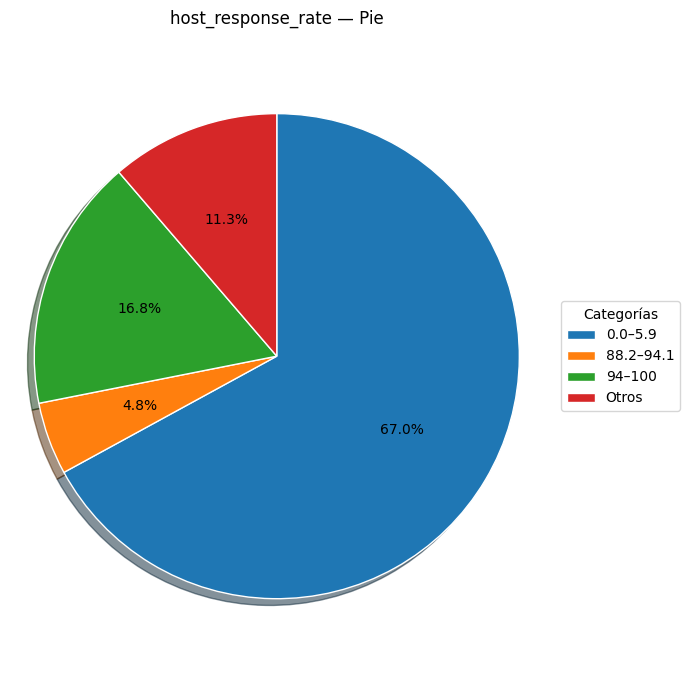

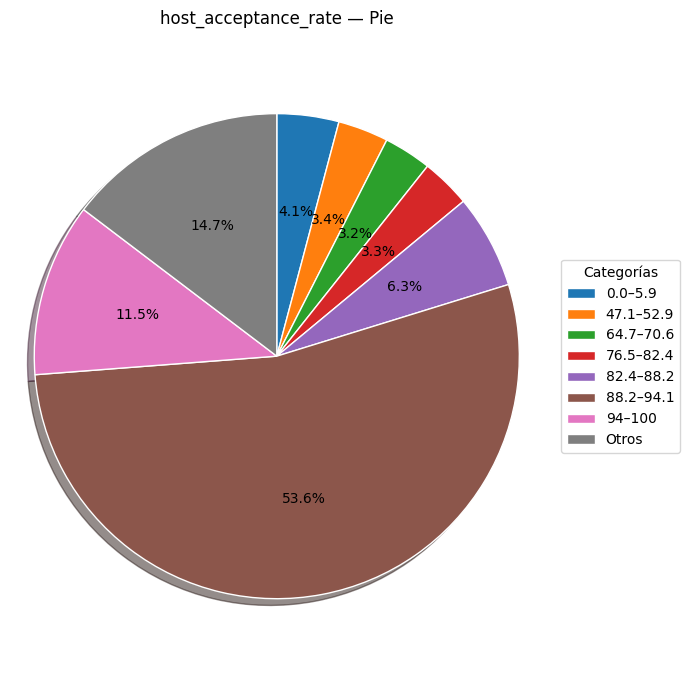

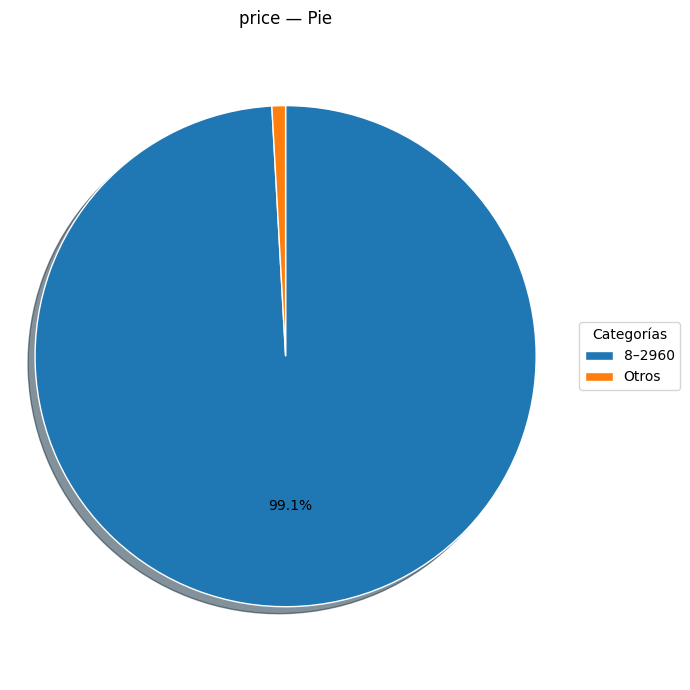

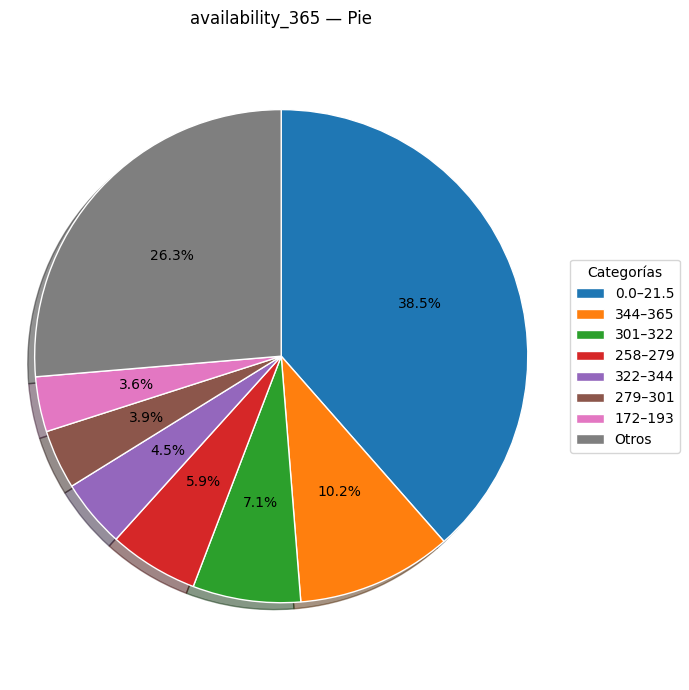

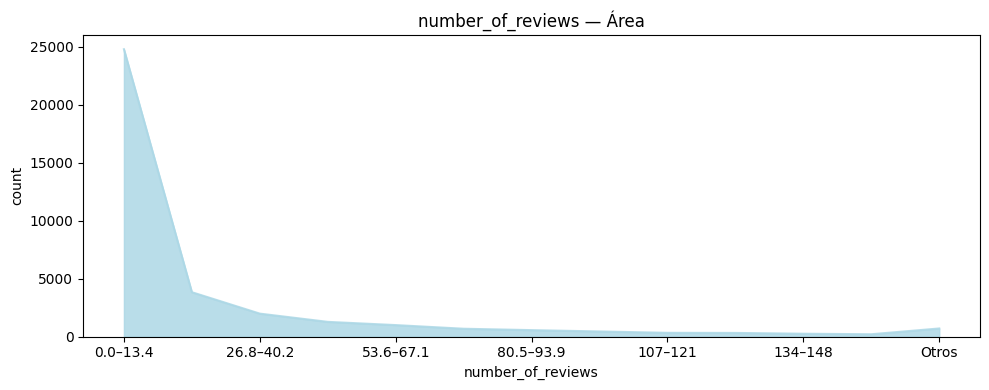

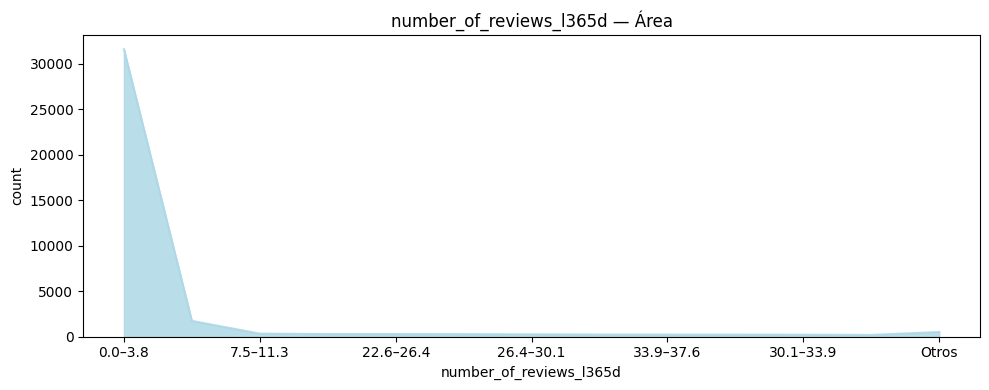

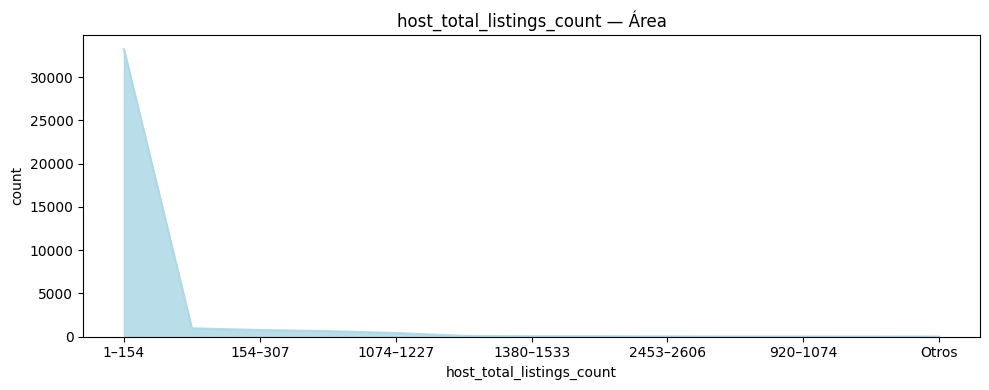

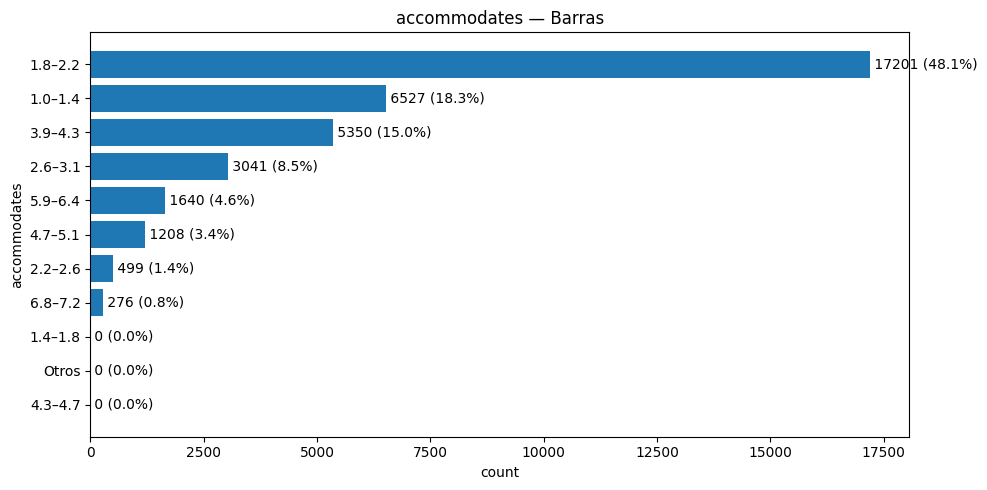

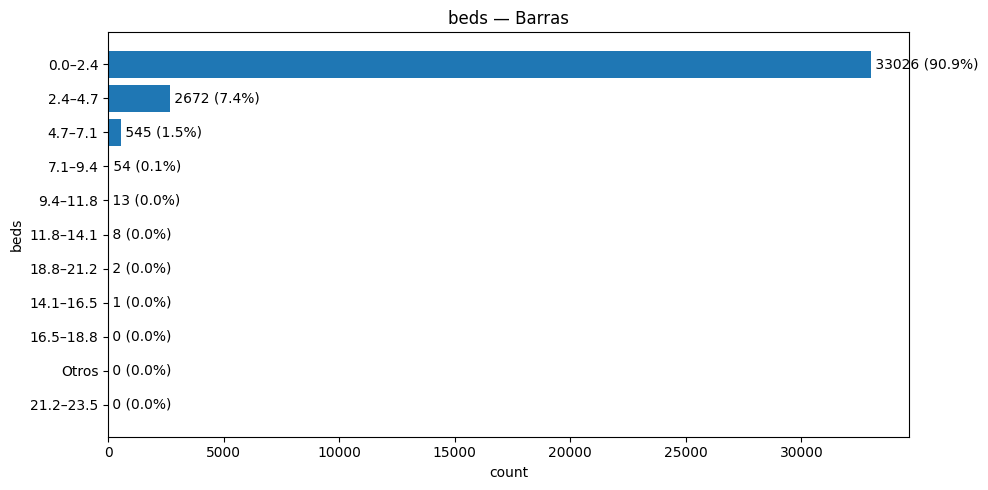

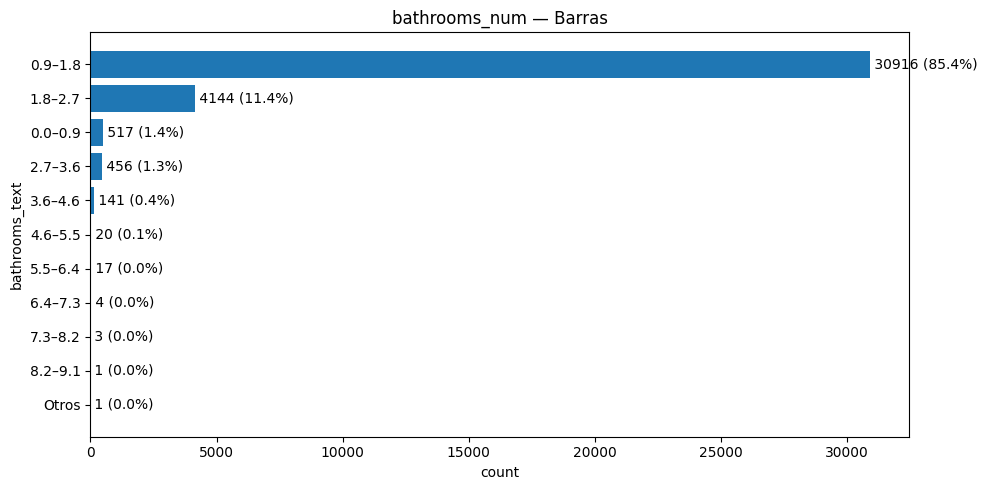

In [250]:
#graficos 
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams["figure.autolayout"] = True

#  PARÁMETROS DE FILTRO 
TOP_K_PIE   = 7    
MIN_PCT_PIE = 3.0  

TOP_K_AREA  = 12   
TOP_K_BAR   = 10   

#  preparación de frecuencias 
def _format_interval(val, decimals=1):
    if isinstance(val, pd.Interval):
        l = val.left
        r = val.right
       
        if max(abs(l), abs(r)) >= 100:
            return f"{int(round(l))}–{int(round(r))}"
        return f"{round(l, decimals)}–{round(r, decimals)}"
    return str(val)

def _short(texto, n=32):
    s = str(texto)
    return s if len(s) <= n else s[: n-1] + "…"

def _clean_freq(df_freq: pd.DataFrame, decimals_label=1) -> pd.DataFrame:
   
    f = df_freq.copy()
    f = f.loc[pd.notna(f.index)]
    f = f.sort_index()
    total = f["count"].sum()
    f["pct"] = (f["count"] / total * 100).round(1)
    f["label"] = f.index.map(lambda x: _format_interval(x, decimals=decimals_label))
    return f

def _apply_filters(f: pd.DataFrame, top_k=None, min_pct=None, keep_otros=True) -> pd.DataFrame:

    g = f.copy()
    # 1) filtramos por min_pct 
    if min_pct is not None:
        keep_mask = g["pct"] >= min_pct
        rest = g.loc[~keep_mask]
        g = g.loc[keep_mask]
    else:
        rest = f.iloc[0:0]  # vacío

    # 2) aseguramos top_k
    if top_k is not None and len(g) > top_k:
        g = g.sort_values("count", ascending=False)
        rest = pd.concat([rest, g.iloc[top_k:]], ignore_index=False)
        g = g.iloc[:top_k]

    # 3) agregamos 'Otros'
    if keep_otros and len(rest) > 0:
        row = pd.DataFrame({
            "count": [int(rest["count"].sum())],
            "pct":   [(rest["count"].sum() / (rest["count"].sum() + g["count"].sum()) * 100).round(1)],
            "label": ["Otros"]
        })
        g = pd.concat([g, row], ignore_index=True)

    return g

#funciones de graficado 
def _autopct_threshold(th=5.0):
    """Muestra % solo si la porción supera 'th'%."""
    def inner(pct):
        return f"{pct:.1f}%" if pct >= th else ""
    return inner

def plot_pie(col, k=TOP_K_PIE, min_pct=MIN_PCT_PIE, title=None):
    f = _apply_filters(_clean_freq(tablas[col]), top_k=k, min_pct=min_pct, keep_otros=True)
    vals   = f["count"].to_numpy()
    labels = [_short(s, 26) for s in f["label"]]

    fig, ax = plt.subplots(figsize=(7,7))
    wedges, texts, autotexts = ax.pie(
        vals, labels=None, autopct=_autopct_threshold(max(3.0, min_pct)),
        startangle=90, counterclock=False, shadow=True,
        wedgeprops={"linewidth": 1, "edgecolor": "white"}
    )
    # leyenda fuera para no saturar el gráfico
    ax.legend(wedges, labels, title="Categorías", loc="center left", bbox_to_anchor=(1.02, 0.5))
    ax.set_title(title or f"{col} — Top {k} (≥{min_pct:.0f}%)+Otros")
    ax.axis("equal")
    plt.show()

def plot_area(col, k=TOP_K_AREA, title=None):
    f = _apply_filters(_clean_freq(tablas[col]), top_k=k, min_pct=None, keep_otros=True)
    s = pd.Series(f["count"].values, index=[_short(x, 24) for x in f["label"]])
    ax = s.plot(kind="area", figsize=(10,4), alpha=0.85, color="lightblue")
    ax.set_title(title or f"{col} — Área (Top {k}+Otros)")
    ax.set_xlabel(col); ax.set_ylabel("count")
    plt.tight_layout(); plt.show()

def plot_bar(col, k=TOP_K_BAR, title=None):
    f = _apply_filters(_clean_freq(tablas[col]), top_k=k, min_pct=None, keep_otros=True)
    s = f.sort_values("count", ascending=True)
    labels = [_short(x, 36) for x in s["label"]]
    plt.figure(figsize=(10,5))
    plt.barh(labels, s["count"].values)
    for y, (v, p) in enumerate(zip(s["count"].values, s["pct"].values)):
        plt.text(v, y, f" {v} ({p}%)", va="center")
    plt.title(title or f"{col} — Barras (Top {k}+Otros)")
    plt.xlabel("count"); plt.ylabel(col)
    plt.tight_layout(); plt.show()


def _pick(existing, prefer, n, avoid=set()):
    out = [c for c in prefer if c in existing and c not in avoid][:n]
    if len(out) < n:
        fuente = vars_10 if "vars_10" in globals() else list(existing)
        for c in fuente:
            if c in existing and c not in out and c not in avoid:
                out.append(c)
            if len(out) == n:
                break
    return out

cols = list(tablas.keys())

if "pie_cols" not in globals():
    prefer_pie  = ["host_response_rate","host_acceptance_rate","price","availability_365"]
    pie_cols  = _pick(cols, prefer_pie, 4)

if "area_cols" not in globals():
    prefer_area = ["number_of_reviews","number_of_reviews_l365d","reviews_per_month"]
    area_cols = _pick(cols, prefer_area, 3, avoid=set(pie_cols))

if "bar_cols" not in globals():
    prefer_bar = ["host_total_listings_count","accommodates","beds"]
    bar_cols = _pick(cols, prefer_bar, 3, avoid=set(pie_cols)|set(area_cols))
  
    extra = _pick(cols, [], 3, avoid=set(pie_cols)|set(area_cols)|set(bar_cols))
    bar_cols = bar_cols + extra  # ahora 6

print("Pie:", pie_cols)
print("Área:", area_cols)
print("Barras:", bar_cols)

#graficar
#  pies
for c in pie_cols:
    plot_pie(c, k=TOP_K_PIE, min_pct=MIN_PCT_PIE, title=f"{'bathrooms_num' if c=='bathrooms_text' else c} — Pie")

#  áreas
for c in area_cols:
    plot_area(c, k=TOP_K_AREA, title=f"{'bathrooms_num' if c=='bathrooms_text' else c} — Área")

#  barras
for c in bar_cols:
    plot_bar(c, k=TOP_K_BAR, title=f"{'bathrooms_num' if c=='bathrooms_text' else c} — Barras")